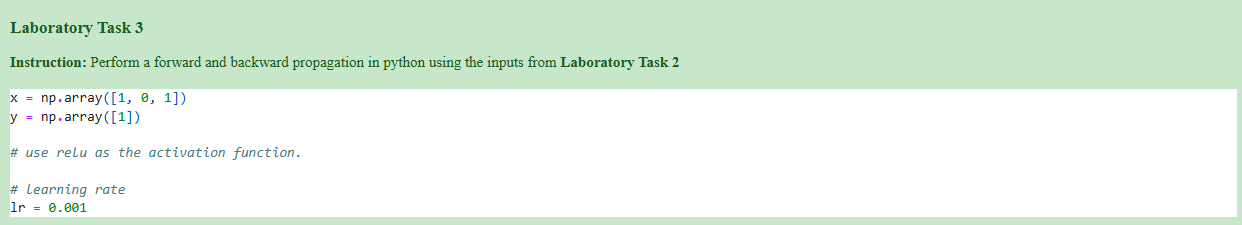

In [1]:
import numpy as np

In [2]:
x = np.array([1, 0, 1])
y = np.array([1])
lr = 0.001

In [3]:
#Weights and biases from Lab 2
W_hidden = np.array([
    [0.2, -0.3],
    [0.4,  0.1],
    [-0.5, 0.2]
])

In [4]:
# Biases for hidden neurons
b_hidden = np.array([-0.4, 0.2])

W_output = np.array([[-0.3], [-0.2]])

# Bias for output neuron
b_output = np.array([0.1])

In [5]:
# Functions
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return np.where(z > 0, 1, 0)

In [6]:
Z_hidden = np.dot(x, W_hidden) + b_hidden
H = relu(Z_hidden)

Z_output = np.dot(H, W_output) + b_output
y_hat = relu(Z_output)

## FeedForward Results

In [7]:
print("Forward Pass:")
print("Z_hidden =", Z_hidden)
print("H (hidden activations) =", H)
print("Z_output =", Z_output)
print("y_hat (prediction) =", y_hat)

Forward Pass:
Z_hidden = [-0.7  0.1]
H (hidden activations) = [0.  0.1]
Z_output = [0.08]
y_hat (prediction) = [0.08]


In [9]:
# Compute loss
loss = np.mean((y - y_hat) ** 2)
print("Loss =", loss)

Loss = 0.8464


# Backward Propagation

In [10]:
# Backward pass
dL_dyhat = 2 * (y_hat - y)

In [11]:
# Derivative through ReLU
dyhat_dZout = relu_derivative(Z_output)
dL_dZout = dL_dyhat * dyhat_dZout

# Gradients
dL_dWout = H.reshape(-1,1) @ dL_dZout.reshape(1,-1)   # outer product
dL_dbout = dL_dZout

In [12]:
dL_dWout = H.reshape(-1,1) @ dL_dZout.reshape(1,-1)   # outer product
dL_dbout = dL_dZout

In [13]:
# Backpropagation to hidden layer
dL_dH = dL_dZout @ W_output.T
dH_dZhidden = relu_derivative(Z_hidden)
dL_dZhidden = dL_dH * dH_dZhidden

In [14]:
# Gradients for hidden weights and biases
dL_dWhidden = x.reshape(-1,1) @ dL_dZhidden.reshape(1,-1)
dL_dbhidden = dL_dZhidden

## Backward Propagation Results

In [15]:
print("\nBackward Pass:")
print("dL_dWout =", "\n",dL_dWout)
print("dL_dbout =", "\n", dL_dbout)
print("dL_dWhidden =","\n", dL_dWhidden)
print("dL_dbhidden =","\n", dL_dbhidden)


Backward Pass:
dL_dWout = 
 [[ 0.   ]
 [-0.184]]
dL_dbout = 
 [-1.84]
dL_dWhidden = 
 [[0.    0.368]
 [0.    0.   ]
 [0.    0.368]]
dL_dbhidden = 
 [0.    0.368]


In [16]:
W_output -= lr * dL_dWout
b_output -= lr * dL_dbout
W_hidden -= lr * dL_dWhidden
b_hidden -= lr * dL_dbhidden

## Final Results

In [17]:
print("\nUpdated Parameters:")
print("W_hidden =","\n", W_hidden)
print("b_hidden =","\n", b_hidden)
print("W_output =", "\n",W_output)
print("b_output =","\n", b_output)


Updated Parameters:
W_hidden = 
 [[ 0.2      -0.300368]
 [ 0.4       0.1     ]
 [-0.5       0.199632]]
b_hidden = 
 [-0.4       0.199632]
W_output = 
 [[-0.3     ]
 [-0.199816]]
b_output = 
 [0.10184]


## Results and conclusion

In this activity, we explored how to perform both forward and backward propagation in a feedforward neural network. In the forward pass, we calculated the weighted sums of the inputs, applied the ReLU activation function, and produced the network’s output. The error was then measured using Mean Squared Error (MSE) to determine the difference between the prediction and the actual target. During backpropagation, we computed the gradients of the loss with respect to the weights and biases using the chain rule and updated the parameters through gradient descent. Overall, this exercise illustrated the full learning process of a neural network—how it generates predictions, evaluates errors, and refines its parameters to improve accuracy over time.
